In [70]:
def extract_intersections(osm, verbose=True):
    # This function takes an osm file as an input. It then goes through each xml 
    # element and searches for nodes that are shared by two or more ways.
    # Parameter:
    # - osm: An xml file that contains OpenStreetMap's map information
    # - verbose: If true, print some outputs to terminal.
    # 
    # Ex) extract_intersections('WashingtonDC.osm')
    #
    tree = ET.parse(osm)
    root = tree.getroot()
    counter = {}
    for child in root:
        if child.tag == 'way':
            for item in child:
                if item.tag == 'nd':
                    nd_ref = item.attrib['ref']
                    if not nd_ref in counter:
                        counter[nd_ref] = 0
                    counter[nd_ref] += 1

    # Find nodes that are shared with more than one way, which
    # might correspond to intersections
    intersections = filter(lambda x: counter[x] > 1,  counter)

    # Extract intersection coordinates
    # You can plot the result using this url.
    # http://www.darrinward.com/lat-long/
    intersection_coordinates = []
    for child in root:
        if child.tag == 'node' and child.attrib['id'] in intersections:
            coordinate = child.attrib['lat'] + ',' + child.attrib['lon']
            if verbose:
                print(coordinate)
            intersection_coordinates.append(coordinate)

    return intersection_coordinates

In [71]:
from xml.etree import cElementTree as ET

In [77]:
extract_intersections(osm="map (1).osm", verbose=True)

40.7046387,-74.0167729


['40.7046387,-74.0167729']

In [78]:
osm = 'map (1).osm'
tree = ET.parse(osm)
root = tree.getroot()
counter = {}
tag_list = []
for child in root:
    tag_list.append(child.tag)


In [80]:
#!pip install pyshp
#!pip install geopandas

    100% |████████████████████████████████| 215kB 5.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyshp ... done
  Stored in directory: /Users/laixiaoya/Library/Caches/pip/wheels/cc/e8/7c/f00fc95ae2a16ed41be9defdd647213a334fd12e03b1452c26
Successfully built pyshp


In [83]:
import shapefile
tpath = 'new-york-latest-free/gis_osm_roads_free_1.shp'
sf = shapefile.Reader(tpath)
shapes = sf.shapes()


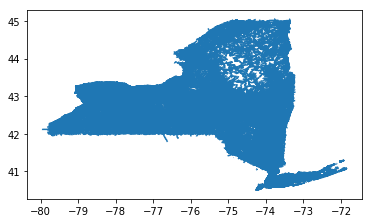

In [91]:
%matplotlib  inline
import shapely, geopandas, fiona
import seaborn as sns
from fiona.crs import from_epsg,from_string
 
tpath = 'new-york-latest-free/gis_osm_roads_free_1.shp'
shp_df = geopandas.GeoDataFrame.from_file(tpath,encoding = 'gb18030')
shp_df.head()
shp_df.plot()

In [92]:
shp_df

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4350423,5131,motorway_link,None,None,F,88,0,F,F,"LINESTRING (-78.7662888 42.9541354, -78.766093..."
1,4350443,5111,motorway,None,I 190,F,88,0,F,F,"LINESTRING (-79.0343738 43.151724, -79.0336757..."
2,4350444,5111,motorway,South Grand Island Bridge,I 190;NY 324,F,88,0,F,F,"LINESTRING (-78.9418379 43.0012172, -78.941357..."
3,4350449,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-78.9184973 42.9892103, -78.917338..."
4,4350451,5111,motorway,Youngmann Expressway,I 290,F,88,0,F,F,"LINESTRING (-78.91158280000001 42.9880809, -78..."
5,4371845,5111,motorway,None,I 190,F,104,0,F,F,"LINESTRING (-78.99010010000001 43.0899373, -78..."
6,4374872,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-78.9122212 42.9884909, -78.913324..."
7,4374873,5111,motorway,Youngmann Expressway,I 290,F,88,0,F,F,"LINESTRING (-78.76585489999999 42.9537643, -78..."
8,4374883,5111,motorway,South Grand Island Bridge,I 190;NY 324,F,88,2,T,F,"LINESTRING (-78.9306074 42.9951022, -78.941070..."
9,4374894,5111,motorway,Niagara Thruway,I 190,F,88,0,F,F,"LINESTRING (-78.9909409 43.0789865, -78.990916..."


In [97]:
shp_df['name'].describe()

count              348219
unique             107865
top       Adirondack Park
freq                 1579
Name: name, dtype: object

In [106]:
from collections import Counter

In [111]:
type(shp_df['geometry'][0])

shapely.geometry.linestring.LineString

In [112]:
Counter(shp_df['name'])

Counter({None: 291697,
         'South Grand Island Bridge': 4,
         'Youngmann Expressway': 85,
         'Niagara Thruway': 146,
         'North Grand Island Bridge': 3,
         'New York State Thruway': 1304,
         'Highway 401': 2,
         'Boerum Place': 15,
         'Highway 137': 10,
         'Hemlock Ridge Road': 2,
         'Homestead Avenue': 24,
         'Liebel Street': 2,
         'Highland Avenue': 200,
         'Mercer Avenue': 6,
         'Pine Tree Lane': 27,
         'Marlyn Drive': 3,
         'Eliot Drive': 3,
         'Fairview Road': 29,
         'Sandy Crest Court': 1,
         'Reamer Street': 1,
         'Jericho Road': 7,
         'Gladwish Road': 1,
         'Whitehead Street': 1,
         'Crounse Lane': 1,
         'Daniel Drive': 18,
         'Taber Court': 1,
         'Pines Court': 1,
         'Remley Lane': 1,
         'Oxford Place': 23,
         'Tubman Circle': 1,
         'Thurlow Terrace': 6,
         'Tallyho Drive': 2,
         'Greenthor

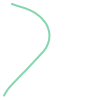

In [118]:
shp_df['geometry'][5]

In [138]:
for i in range(0,len(shp_df['geometry'])):
    for j in range(i+1, len(shp_df['geometry'])):
        if shp_df['geometry'][i].intersects(shp_df['geometry'][j]) == True\
        and shp_df['geometry'][i].contains(shp_df['geometry'][j]) == False:
            print(shp_df['geometry'][i].intersection(shp_df['geometry'][j]))

POINT (-78.7662888 42.9541354)
POINT (-78.7662888 42.9541354)
POINT (-78.765702 42.9509067)
POINT (-79.0336757 43.1517117)
POINT (-79.0343738 43.151724)
POINT (-79.03128673623722 43.15126009510806)
POINT (-79.03140692054043 43.15129019277988)
POINT (-79.0321345 43.1514724)
POINT (-79.0294148 43.1506175)
POINT (-79.0294148 43.1506175)
POINT (-79.032695 43.151593)
POINT (-78.94135730000001 43.0009293)
POINT (-78.94135730000001 43.0009293)
POINT (-78.9418379 43.0012172)
POINT (-78.9157024 42.9874642)
POINT (-78.9184973 42.9892103)
POINT (-78.91158280000001 42.9880809)
POINT (-78.89874858015497 42.99272785025847)
POINT (-78.90214145172243 42.99210856574037)
POINT (-78.91158280000001 42.9880809)
POINT (-78.89200990000001 42.9938006)
POINT (-78.9890539 43.0915675)
POINT (-78.9862693 43.1060962)
POINT (-78.99010010000001 43.0899373)
POINT (-78.98873260000001 43.1068983)
POINT (-78.9176114 42.9890015)
POINT (-78.9122212 42.9884909)
POINT (-78.9122212 42.9884909)
POINT (-78.76606339999999 42.95

POINT (-73.792025 42.527755)
POINT (-73.9388332 42.710279)
POINT (-73.9388332 42.710279)
POINT (-73.77374279999999 42.6590945)
POINT (-73.77362100000001 42.659027)
POINT (-73.77362100000001 42.659027)
POINT (-73.77374279999999 42.6590945)
POINT (-73.794854 42.7274676)
POINT (-73.794854 42.7274676)
POINT (-73.794854 42.7274676)
POINT (-73.7895032 42.7318031)
POINT (-73.814367 42.479577)
POINT (-73.814854 42.481245)
POINT (-73.812624 42.479934)
POINT (-73.70294199999999 42.732926)
POINT (-73.70296500000001 42.732838)
POINT (-73.70294199999999 42.732926)
POINT (-73.70296500000001 42.732838)
POINT (-73.7967146 42.7568097)
MULTIPOINT (-73.7982887 42.7564452, -73.797995 42.756816)
MULTIPOINT (-73.798198 42.754729, -73.7978282 42.7554548)
POINT (-73.8220622 42.5618042)
POINT (-73.82521010000001 42.5577915)
POINT (-73.943994 42.675791)
POINT (-73.944075 42.674432)
POINT (-73.87178299999999 42.626606)
POINT (-73.871652 42.626627)
POINT (-73.7558334 42.762721)
POINT (-73.7558334 42.762721)
POINT

KeyboardInterrupt: 